In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

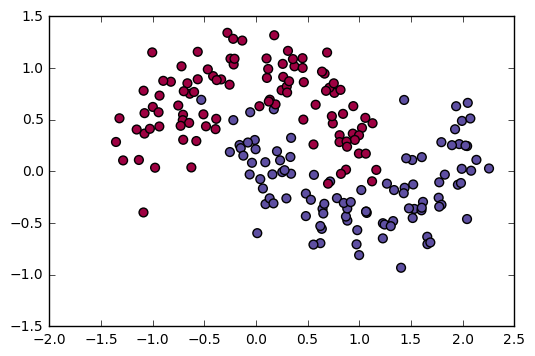

In [46]:
# A random seed for all numpy randomized operations
np.random.seed (0)

# Makes two interleaving half-circles based on the 
# gaussian distribution
X, y = make_moons (200, noise=0.20)

# Plot the data we generated
plt.scatter (X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show ()

## Logistic Regression

We will now attempt to classify our data using Logistic Regression. The important thing to note in this case, is that the data is not linearly separable thus our intention is to show the difficulty that linear regression will have in coming up with a satisfactory classifier.

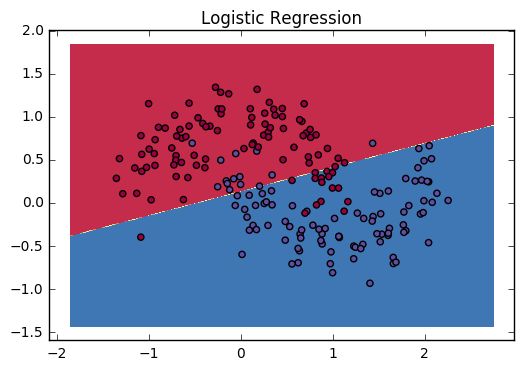

In [47]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV ()
clf.fit (X, y)

def plot_decision_boundary (prediction_function):
    # Set minimum and maximum values for the X and Y axis
    x_min, x_max = X[:,0].min () - 0.5, X[:,0].max () + 0.5
    y_min, y_max = X[:,1].min () - 0.5, X[:,1].max () + 0.5
    
    # Generate a grid of points with distance h between them
    h = 0.01
    xx, yy = np.meshgrid (np.arange (x_min, x_max, h), np.arange (y_min, y_max, h))
    
    # We predict the value of our function throughout the entire grid
    Z = prediction_function (np.c_[xx.ravel (), yy.ravel ()])
    Z = Z.reshape (xx.shape)
    
    # Plot the contour's (decision boundary) and training examples
    plt.contourf (xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter (X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary (lambda x: clf.predict (x))
plt.title("Logistic Regression")
plt.show ()